In [24]:
from os.path import join
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
datadir = '/home/mattho/git/cmass-ili/data/borg/cosmo_dep'
# ic = np.load(join(datadir, 'ic.npy'))
rho = np.load(join(datadir, 'rho.npy'))
# part = np.load(join(datadir, 'part.npy'))

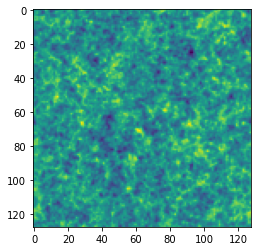

In [3]:
plt.imshow(np.sum(rho[:,:,:5], axis=-1))

In [8]:
rho.mean()

4.2182240773264157e-19

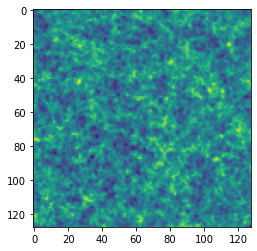

In [45]:
plt.imshow(np.sum(rho2[:,:,:5], axis=-1))

In [9]:
np.var(rho)

7.504044217051015e-05

In [47]:
np.std(rho2)

0.008755265970588736

In [110]:
fname = "/home/mattho/data/quijote/density_field/fiducial/300/df_m_z=127.npy"
truth = np.load(fname)

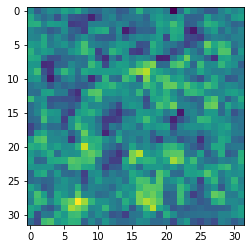

In [111]:
plt.imshow(np.sum(truth[:,:,:5], axis=-1))

In [112]:
np.std(truth)

0.002960474

In [3]:
dat = np.genfromtxt(join(datadir, 'var_quijoteLH-11.csv'), delimiter=',')

In [4]:
np.std(np.sqrt(dat[:,-1]))/np.mean(np.sqrt(dat[:,-1]))

0.0010502922196086197

(array([ 1.,  1.,  6.,  7.,  9., 18., 26., 18.,  9.,  5.]),
 array([6.79406107e-05, 6.80155436e-05, 6.80904765e-05, 6.81654095e-05,
        6.82403424e-05, 6.83152753e-05, 6.83902082e-05, 6.84651412e-05,
        6.85400741e-05, 6.86150070e-05, 6.86899399e-05]),
 <BarContainer object of 10 artists>)

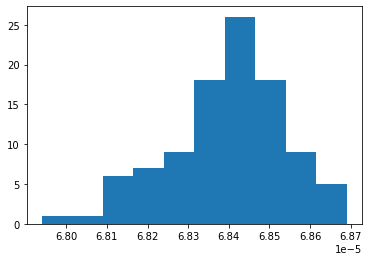

In [6]:
plt.hist(dat[:,-1])

In [110]:
import pandas as pd

Nqui = 2000
mean = pd.Series(np.zeros(Nqui), name='mean variance')
std = pd.Series(np.zeros(Nqui), name='std variance')
for i in range(Nqui):
    dat = np.genfromtxt(join(datadir, f'var_quijoteLH-{i}.csv'), delimiter=',')
    dat = np.sqrt(dat[:,-1])
    mean[i] = np.mean(dat)
    std[i] = np.std(dat)

1513    0.000823
1700    0.000831
1932    0.000856
1839    0.000863
1185    0.000864
          ...   
1897    0.010357
1048    0.010433
839     0.010910
1406    0.011059
477     0.011468
Length: 2000, dtype: float64

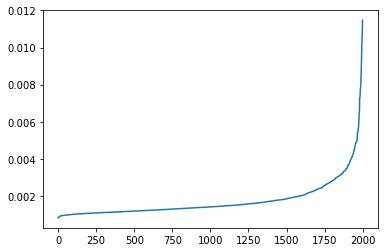

In [111]:
tmp = (std/mean).sort_values()
plt.plot(tmp.values)
tmp

In [33]:
dat = np.genfromtxt(join(datadir, f'var_quijoteLH-{839}.csv'), delimiter=',')

(array([ 1.,  4., 12., 16., 20., 12., 13., 16.,  3.,  3.]),
 array([0.97320205, 0.97845795, 0.98371385, 0.98896975, 0.99422565,
        0.99948154, 1.00473744, 1.00999334, 1.01524924, 1.02050514,
        1.02576104]),
 <BarContainer object of 10 artists>)

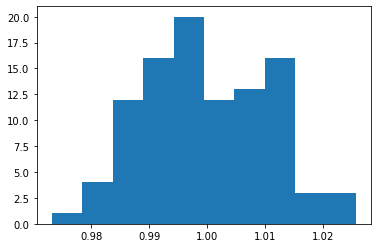

In [34]:
plt.hist(np.sqrt(dat[:,-1]/np.mean(dat[:,-1])))

In [35]:
mean.to_csv(join(datadir,'var_quijoteLH-all.csv'))

In [105]:
datdiff = np.genfromtxt(join(datadir, f'var_quijoteLH-diffusion.txt'), delimiter=' ')

(array([134., 273., 358., 372., 331., 210., 103.,  70.,  32.,  17.]),
 array([0.00458279, 0.00531534, 0.00604789, 0.00678043, 0.00751298,
        0.00824553, 0.00897808, 0.00971063, 0.01044318, 0.01117573,
        0.01190828]),
 <BarContainer object of 10 artists>)

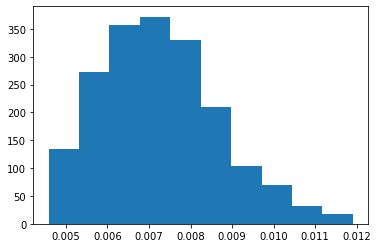

In [106]:
plt.hist(np.sqrt(datdiff))

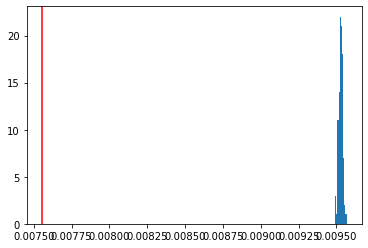

In [108]:
ind = np.random.randint(1900)
dat = np.genfromtxt(join(datadir, f'var_quijoteLH-{ind}.csv'), delimiter=',')

plt.hist(np.sqrt(dat[:,-1]))
plt.axvline(np.sqrt(datdiff[ind]), color='r')

In [109]:
datall = pd.read_csv(join(datadir,'var_quijoteLH-all.csv')).values[:,-1]

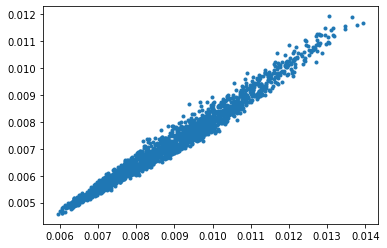

In [113]:
# plt.loglog()
plt.plot(np.sqrt(datall[:1900]), np.sqrt(datdiff), '.')

In [188]:
from sklearn.linear_model import LinearRegression

# x = np.log(datall[:1900,None])
# y = np.log(datdiff)
x = np.sqrt(datall[:1900,None])
y = np.sqrt(datdiff)
lr = LinearRegression().fit(x,y)

In [135]:
# x_ = np.log(10**np.linspace(-5, -3, 10))[:,None]
x_ = np.linspace(6e-3, 15e-3, 10)[:,None]
y_ = lr.predict(x_)

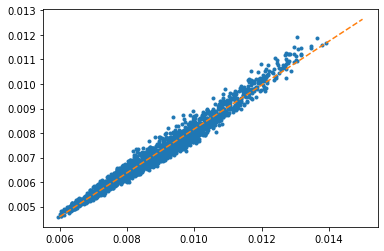

In [136]:
# plt.loglog()

plt.plot(x,y, '.')
plt.plot(x_, y_, '--')
# plt.xlim(5e-3,15e-3)
# plt.ylim(4e-3,15e-3)

In [195]:
# yp = lr.predict(x)
yp = lr.predict(np.sqrt(datall[:,None]))

In [206]:
pd.Series(yp**2, name='mean var scaled').to_csv(join(datadir,'var_quijoteLH-all-scaled.csv'))

0.03242424810087976

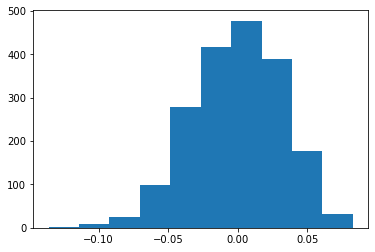

In [138]:
plt.hist((yp-y)/yp)
np.std((yp-y)/yp)

In [150]:
1/lr.coef_

array([1.11762632])

In [128]:
lr.intercept_

-0.0007821191030271905

In [102]:
np.mean(np.sqrt(std/mean))

0.05754039000512272

In [144]:
import pandas as pd

Nqui = 2000
mean = pd.Series(np.zeros(Nqui), name='mean variance')
std = pd.Series(np.zeros(Nqui), name='std variance')
diff = pd.Series(np.zeros(100*Nqui))
for i in range(Nqui):
    dat = np.genfromtxt(join(datadir, f'var_quijoteLH-{i}.csv'), delimiter=',')
    
    mean[i] = np.mean(dat[:,-1])
    std[i] = np.std(dat[:,-1])
    diff[i*100:(i+1)*100] = (np.sqrt(dat[:,-1])-np.sqrt(mean[i]))/np.sqrt(mean[i])

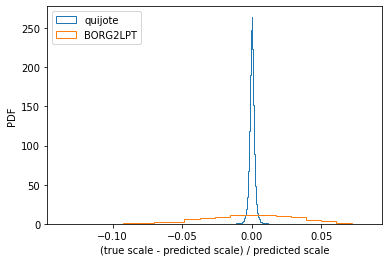

In [156]:
_ = plt.hist(diff, 100, density=True, histtype='step', label='quijote')
_ = plt.hist((yp-y)/yp, 20, density=True, histtype='step', label='BORG2LPT')

# plt.semilogy()
plt.xlabel('(true scale - predicted scale) / predicted scale')
plt.ylabel('PDF')
plt.legend()
# _ = plt.hist(np.sqrt(y/yp), 10, density=True)

In [148]:
np.std((yp-y)/yp)

0.03242424810087976

In [98]:
np.std(y/yp)
np.std(perc)

0.004129170505122248

1.0626014629711396

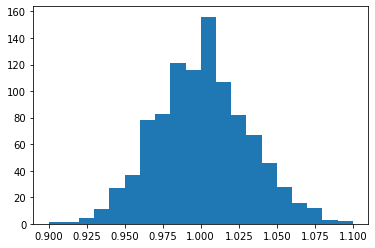

In [187]:
# plt.semilogy()
tmp = 1/(1.0+0.03*np.random.normal(size=1000))
_ = plt.hist(tmp, 20, range=(0.9,1.1))
(1+np.std(tmp))**2

In [162]:
1/0.64

1.5625